This notebook plots reaction rates as a function of temperature from Webnucleo XML reaction data.  First install and import the necessary packages.  Installation of wnutils installs numpy and matplotlib.

In [1]:
import sys
!{sys.executable} -m pip install --quiet wnutils 
!{sys.executable} -m pip install --quiet requests

import wnutils.xml as wx
import matplotlib.pyplot as plt
import numpy as np
import os, io, requests

Here we create a routine to compute any user-defined rate function(s).  The simple example here is a placeholder.

In [2]:
def my_func(t9):
    return t9 + t9**2

Now create a dictionary of the user-defined rate functions.

In [3]:
my_user_rates = {'user_rate': my_func}

Begin by reading in the XML.  You may read the data over the web from an appropriate URL (the default for this notebook downloads the Webnucleo V2.2 Reaclib data from [OSF](https://osf.io/kjnct/)) or from a local directory (as in the comment).  If you are running the notebook on Google Colab, you can upload the data to the work directory by clicking on the directory tab to the left and then clicking the upload symbol.  On Colab, you may also read the file from Google Drive (click the Drive icon and follow the instructions).

In [4]:
xml = wx.Xml(io.BytesIO(requests.get('https://osf.io/kyhbs/download').content))
#xml= wx.Xml("example.xml")

Now select the temperatures at which to plot the reaction rates.  The default is to plot them on a logarithmic scale between $T_9 = T/10^9\ K = 0.01$ and $T_9 = 10$.

In [5]:
t9s = np.logspace(-2, 1, 100)

Now select the reactions to plot by [XPath](https://www.w3schools.com/xml/xpath_intro.asp).  The XPath expression should select a number of individual reactions.

In [6]:
reactions = xml.get_reaction_data("[reactant = 'c12']")

Plot the reaction rates as a function of $T_9 = T / 10^9\ K$.  Adjust the matplotlib commands as desired.

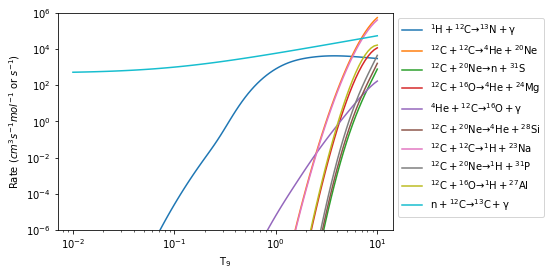

In [7]:
for r in reactions:
    y = []
    for t9 in t9s:
        y.append(reactions[r].compute_rate(t9, user_funcs = my_user_rates)) 
    plt.plot(t9s, y, label=reactions[r].get_latex_string())

plt.xscale('log')
plt.yscale('log')

plt.ylim([1.e-6, 1.e6])

plt.xlabel('${\\rm T_9}$')
plt.ylabel('Rate ($cm^3 s^{-1} mol^{-1}$ or $s^{-1}$)')

plt.legend(bbox_to_anchor = (1,1), loc='upper left', ncol = 1)